# **Energy01**


In [1]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data and connection

energy001=pd.read_csv("/content/drive/MyDrive/datascience/Data/Final Project/Sites Energy Consumption Part_001.csv")
energy02=pd.read_csv("/content/drive/MyDrive/datascience/Data/Final Project/Sites Energy Consumption Part_002.csv")
energy03=pd.read_csv("/content/drive/MyDrive/datascience/Data/Final Project/Sites Energy Consumption Part_003.csv")
#combine data
# Combine the datasets
energy01= pd.concat([energy001, energy02, energy02], ignore_index=True)


# Replace ',' with '-' to ensure correct date format
#energy01['DateTime'] = energy01['DateTime'].str.replace(',', '-')
energy01
print(energy01.columns)
# Strip any leading or trailing spaces from the column names
energy01.columns = energy01.columns.str.strip()
energy01
energy01 = energy01.rename(columns={'KWH/hh (per half hour)': 'KWH_per_half_hour'})
energy01.info()
energy01['DateTime'].head(150)

Index(['cell_id', 'DateTime', 'KWH/hh (per half hour) ', 'site_id', 'region'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374183 entries, 0 to 1374182
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cell_id            1374183 non-null  object 
 1   DateTime           1374183 non-null  object 
 2   KWH_per_half_hour  1374183 non-null  float64
 3   site_id            1374183 non-null  object 
 4   region             1374183 non-null  object 
dtypes: float64(1), object(4)
memory usage: 52.4+ MB


,DateTime
0,"00:00:00 13,01,01"
1,"00:30:00 13,01,01"
2,"01:00:00 13,01,01"
3,"01:30:00 13,01,01"
4,"02:00:00 13,01,01"
...,...
145,"00:30:00 13,04,01"
146,"01:00:00 13,04,01"
147,"01:30:00 13,04,01"
148,"02:00:00 13,04,01"


DateTime

In [3]:
#DateTime
#new
 #Split DateTime into Time and Date using str.split()
energy01[['Time', 'Date']] = energy01['DateTime'].str.split(' ', expand=True)



# Split 'Date' into year, day, month
energy01[['Year', 'Day', 'Month']] = energy01['Date'].str.split(',', expand=True)

# Correct the year, format the 'FormattedDate' as DD-MM-YYYY
# Convert 'Year' to 4 digits (e.g., '13' to '2013')
energy01['Year'] = '20' + energy01['Year']

# Create a new 'FormattedDate' with the desired format 'DD-MM-YYYY'
energy01['FormattedDate'] = energy01['Day'] + '-' + energy01['Month'] + '-' + energy01['Year']

#  Combine 'FormattedDate' and 'Time' into the final 'DateTimeFormatted'
energy01['DateTimeFormatted'] = energy01['FormattedDate'] + ' ' + energy01['Time']
#Convert 'DateTimeFormatted' to datetime type and overwrite the original 'DateTime' column
energy01['DateTime'] = pd.to_datetime(energy01['DateTimeFormatted'], format='%d-%m-%Y %H:%M:%S')

# Convert 'DateTime' to datetime type
energy01['DateTime'] = pd.to_datetime(energy01['DateTime'], format='%d,%m,%y %H:%M:%S', errors='coerce')

# Convert 'Time' to timedelta type
energy01['Time'] = pd.to_timedelta(energy01['Time'])

print(energy01.info())
#energy01['DateTimeFormatted'].head(10)
# Display the final result
print(energy01[['DateTime', 'DateTimeFormatted']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374183 entries, 0 to 1374182
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype          
---  ------             --------------    -----          
 0   cell_id            1374183 non-null  object         
 1   DateTime           1374183 non-null  datetime64[ns] 
 2   KWH_per_half_hour  1374183 non-null  float64        
 3   site_id            1374183 non-null  object         
 4   region             1374183 non-null  object         
 5   Time               1374183 non-null  timedelta64[ns]
 6   Date               1374183 non-null  object         
 7   Year               1374183 non-null  object         
 8   Day                1374183 non-null  object         
 9   Month              1374183 non-null  object         
 10  FormattedDate      1374183 non-null  object         
 11  DateTimeFormatted  1374183 non-null  object         
dtypes: datetime64[ns](1), float64(1), object(9), timedelta64[ns](1)
memory

Duplicates

In [4]:
#new
# Check for duplicates in the DateTime column
duplicates = energy01['DateTime'].duplicated().sum()  # Returns the count of duplicate rows
print(f"Number of duplicate rows in DateTime: {duplicates}")

# Check for NaT (null) values in the DateTime column
null_values = energy01['DateTime'].isnull().sum()  # Returns the count of NaT (null) values
print(f"Number of null (NaT) values in DateTime: {null_values}")
#inspect rows with duplicates
duplicate_rows = energy01[energy01['DateTime'].duplicated()]
print(f"Duplicate rows:\n{duplicate_rows}")

Number of duplicate rows in DateTime: 1356663
Number of null (NaT) values in DateTime: 0
Duplicate rows:
           cell_id            DateTime  KWH_per_half_hour site_id region  \
961      MAC000002 2013-01-21 00:00:00              0.210       A      A   
2450     MAC000002 2013-02-21 00:00:00              0.216       A      A   
3939     MAC000002 2013-03-24 00:00:00              0.486       A      A   
5428     MAC000002 2013-04-24 00:00:00              0.147       A      A   
6917     MAC000002 2013-05-25 00:00:00              0.170       A      A   
...            ...                 ...                ...     ...    ...   
1374178  MAC000069 2013-05-12 20:00:00              0.061       G      C   
1374179  MAC000069 2013-05-12 20:30:00              0.090       G      C   
1374180  MAC000069 2013-05-12 21:00:00              0.069       G      C   
1374181  MAC000069 2013-05-12 21:30:00              0.084       G      C   
1374182  MAC000069 2013-05-12 22:00:00              0.088  

In [5]:
#new
# Check for duplicate rows across all columns
duplicate_rows = energy01[energy01.duplicated()]

# Count the number of duplicate rows
duplicate_count = energy01.duplicated().sum() #445532

# Display the duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")
print(f"Duplicate rows:\n{duplicate_rows}")

# Check for any rows that are completely null (NaN/NaT) across all columns
null_rows = energy01[energy01.isnull().all(axis=1)]

# Count the number of rows that are completely null
null_count = energy01.isnull().all(axis=1).sum() #0

# Display rows that are completely null
print(f"Number of rows with all null values: {null_count}")
print(f"Rows with all null values:\n{null_rows}")
# Remove duplicate rows
energy01= energy01.drop_duplicates()
energy01.info()

Number of duplicate rows: 445532
Duplicate rows:
           cell_id            DateTime  KWH_per_half_hour site_id region  \
961      MAC000002 2013-01-21 00:00:00              0.210       A      A   
2450     MAC000002 2013-02-21 00:00:00              0.216       A      A   
3939     MAC000002 2013-03-24 00:00:00              0.486       A      A   
5428     MAC000002 2013-04-24 00:00:00              0.147       A      A   
6917     MAC000002 2013-05-25 00:00:00              0.170       A      A   
...            ...                 ...                ...     ...    ...   
1374178  MAC000069 2013-05-12 20:00:00              0.061       G      C   
1374179  MAC000069 2013-05-12 20:30:00              0.090       G      C   
1374180  MAC000069 2013-05-12 21:00:00              0.069       G      C   
1374181  MAC000069 2013-05-12 21:30:00              0.084       G      C   
1374182  MAC000069 2013-05-12 22:00:00              0.088       G      C   

                   Time      Date  Yea

In [104]:
energy01.duplicated().sum()

0

**Site_id**

In [6]:
#siteid col
energy01['site_id'].unique()
# Check for missing values
print(energy01['site_id'].isnull().sum())

# Check for duplicates based on site_id, cell_id, and DateTime
duplicates = energy01.duplicated(subset=['site_id', 'cell_id', 'DateTime'])
print(f"Number of duplicate rows: {duplicates.sum()}")
energy01.duplicated().sum()

0
Number of duplicate rows: 0


0

No dupluicates

**cell_id**

In [7]:
# Check unique values in 'cell_id'
print(energy01['cell_id'].unique())

# Check for missing values
print(energy01['cell_id'].isnull().sum())

# Check for duplicates based on 'cell_id' and 'DateTime'
duplicates = energy01.duplicated(subset=['cell_id', 'DateTime'])
print(f"Number of duplicate rows: {duplicates.sum()}")




['MAC000002' 'MAC000003' 'MAC000004' 'MAC000006' 'MAC000007' 'MAC000008'
 'MAC000009' 'MAC000010' 'MAC000011' 'MAC000012' 'MAC000013' 'MAC000016'
 'MAC000018' 'MAC000019' 'MAC000020' 'MAC000021' 'MAC000022' 'MAC000023'
 'MAC000024' 'MAC000025' 'MAC000026' 'MAC000027' 'MAC000028' 'MAC000029'
 'MAC000030' 'MAC000032' 'MAC000033' 'MAC000034' 'MAC000035' 'MAC000036'
 'MAC000037' 'MAC000038' 'MAC000039' 'MAC000040' 'MAC000041' 'MAC000042'
 'MAC000043' 'MAC000045' 'MAC000047' 'MAC000049' 'MAC000050' 'MAC000053'
 'MAC000054' 'MAC000055' 'MAC000056' 'MAC000057' 'MAC000058' 'MAC000059'
 'MAC000060' 'MAC000061' 'MAC000062' 'MAC000063' 'MAC000066' 'MAC000067'
 'MAC000068' 'MAC000069']
0
Number of duplicate rows: 0


region

In [8]:
energy01['region'].unique()
# Check for missing values in the 'region' column
missing_region = energy01['region'].isnull().sum()
print(f"Missing 'region' values: {missing_region}")

# Check if all 'region' values are valid
valid_regions = ['A', 'B', 'C', 'D']
invalid_regions = energy01[~energy01['region'].isin(valid_regions)]
print(f"Invalid 'region' values:\n{invalid_regions}")

energy01['region'].unique()


Missing 'region' values: 0
Invalid 'region' values:
Empty DataFrame
Columns: [cell_id, DateTime, KWH_per_half_hour, site_id, region, Time, Date, Year, Day, Month, FormattedDate, DateTimeFormatted]
Index: []


array(['A', 'B', 'C', 'D'], dtype=object)

In [9]:
#analysis-----------------------------------------------------------------------------

# Calculate total energy consumption by region
region_energy = energy01.groupby('region')['KWH_per_half_hour'].sum().reset_index()
print(region_energy)

# Calculate average energy consumption by region
region_avg_energy = energy01.groupby('region')['KWH_per_half_hour'].mean().reset_index()
print(region_avg_energy)


  region  KWH_per_half_hour
0      A      108879.684999
1      B       67071.919997
2      C       48828.910997
3      D        5020.054000
  region  KWH_per_half_hour
0      A           0.299048
1      B           0.191066
2      C           0.249123
3      D           0.286549


**KWH**

In [106]:
energy01['KWH_per_half_hour'].isnull().sum()

x=(energy01['KWH_per_half_hour'] < 0).sum() # Count values less than 0
print(x)
print(energy01[['KWH_per_half_hour']].describe())
#energy01.tail()

0
       KWH_per_half_hour
count      928651.000000
mean            0.153915
std             0.120569
min             0.000000
25%             0.064000
50%             0.137000
75%             0.203000
max             0.559000


In [107]:
energy01.isnull().sum()
energy01.duplicated().sum()
print(energy01['DateTime'].head())

0        2013-01-01
659667   2013-01-01
677199   2013-01-01
154745   2013-01-01
682291   2013-01-01
Name: DateTime, dtype: datetime64[ns]


In [108]:
#NEW

# Ensure 'DateTime' column is in datetime format if not already
energy01['DateTime'] = pd.to_datetime(energy01['DateTime'], errors='coerce')

# Drop rows with NaT values in DateTime
energy01.dropna(subset=['DateTime'], inplace=True)

# Sort by DateTime
energy01.sort_values('DateTime', inplace=True)

# Generate all possible 30-minute intervals between the min and max DateTime
all_times = pd.date_range(energy01['DateTime'].min(), energy01['DateTime'].max(), freq='30min')

# Check for duplicates in DateTime column
duplicates = energy01['DateTime'].duplicated().sum()
print(f"Number of duplicate rows in DateTime column: {duplicates}")

# Check for exact matches between the generated times and existing DateTime values
missing_times = set(all_times) - set(energy01['DateTime'])
print(f"Missing DateTime values found: {len(missing_times)}")

# Optionally, round the DateTime to 30-minute intervals to handle precision issues
energy01['DateTime'] = energy01['DateTime'].dt.round('30min')

# Recalculate missing times after rounding
missing_times_rounded = set(all_times) - set(energy01['DateTime'])
print(f"Missing DateTime values found (after rounding): {len(missing_times_rounded)}")

if missing_times_rounded:
    # Convert to DataFrame for analysis if missing times are present
    missing_times_df = pd.DataFrame(sorted(missing_times_rounded), columns=['Missing DateTime'])

    # Ensure 'Missing DateTime' is in datetime format
    missing_times_df['Missing DateTime'] = pd.to_datetime(missing_times_df['Missing DateTime'])

    # Find gaps between consecutive missing DateTime values
    missing_times_df['Gap'] = missing_times_df['Missing DateTime'].diff().dt.total_seconds() / 60

    # View summary of gaps
    print(missing_times_df.describe())

    # Filter large gaps (e.g., > 60 minutes)
    large_gaps = missing_times_df[missing_times_df['Gap'] > 60]
    print(large_gaps.head())
else:
    print("No missing DateTime values found (after rounding).")


Number of duplicate rows in DateTime column: 911131
Missing DateTime values found: 0
Missing DateTime values found (after rounding): 0
No missing DateTime values found (after rounding).


Minimum gap duration: 30 minutes
Maximum gap duration: 1470 minutes (24.5 hours)

          cell_id            DateTime  KWH_per_half_hour site_id region  \
501918  MAC000037 2013-01-01 00:00:00                0.0       E      A   
154745  MAC000012 2013-01-01 00:00:00                0.0       E      A   
734879  MAC000056 2013-01-01 00:00:00                0.0       Q      B   
35062   MAC000004 2013-01-01 00:00:00                0.0       E      A   
52593   MAC000006 2013-01-01 00:00:00                0.0       Q      B   
...           ...                 ...                ...     ...    ...   
52591   MAC000004 2013-12-31 23:00:00                0.0       E      A   
519447  MAC000037 2013-12-31 23:00:00                0.0       E      A   
172275  MAC000012 2013-12-31 23:30:00                0.0       E      A   
519448  MAC000037 2013-12-31 23:30:00                0.0       E      A   
752408  MAC000056 2013-12-31 23:30:00                0.0       Q      B   

                  Time       Date  Year Day Month FormattedDate  \
501918 0 days 00:00:00 2013-01-0

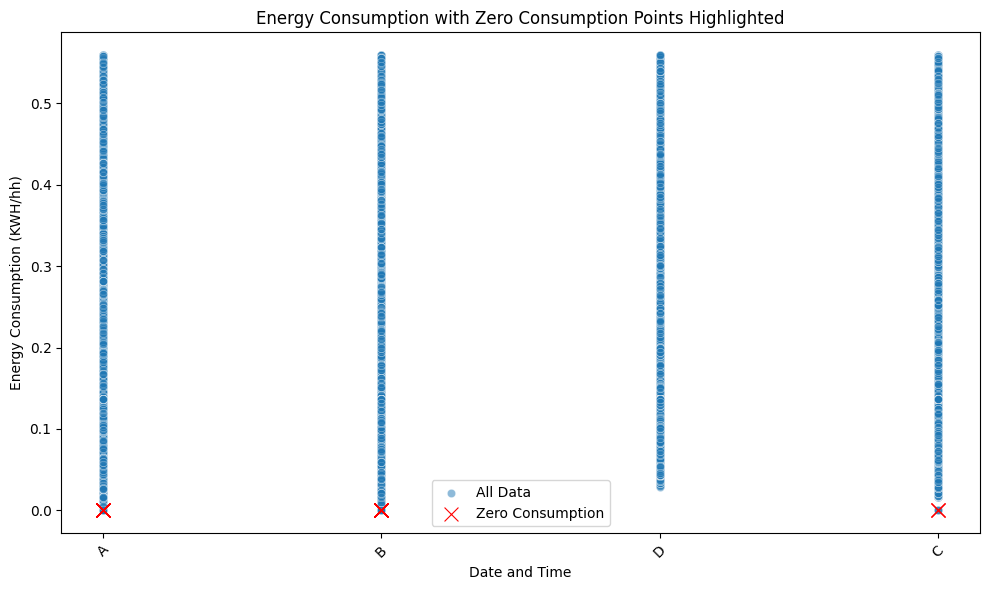

In [110]:
#power cons. = 0 , i will keep these values
energy01['KWH_per_half_hour'].describe()
(energy01['KWH_per_half_hour'] == 0).sum()
# View records where 'KWH_per_half_hour' is 0
zero_consumption_records = energy01[energy01['KWH_per_half_hour'] == 0]
print(zero_consumption_records)
#viz
plt.figure(figsize=(10, 6))
sns.scatterplot(x=energy01['region'], y=energy01['KWH_per_half_hour'], label='All Data', alpha=0.5)

# Highlight zero consumption points in red
sns.scatterplot(x=zero_consumption_records['region'], y=zero_consumption_records['KWH_per_half_hour'],
label='Zero Consumption', color='red', marker='x', s=100)

plt.title('Energy Consumption with Zero Consumption Points Highlighted')
plt.xlabel('Date and Time')
plt.ylabel('Energy Consumption (KWH/hh)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Region D donot have 0 power cons.

Anomelay **deatection**

**check** **outliers**

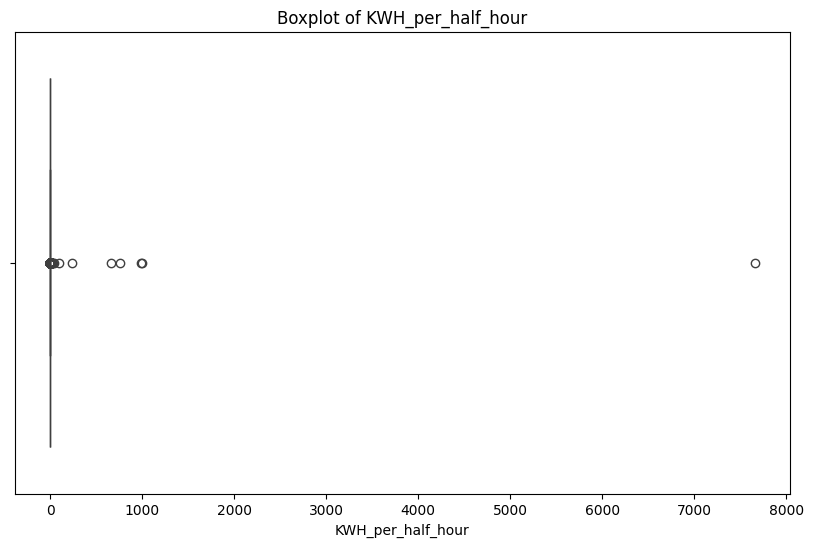

          cell_id            DateTime  KWH_per_half_hour site_id region  \
659667  MAC000049 2013-01-01 00:00:00              0.590       E      A   
717350  MAC000055 2013-01-01 00:00:00              0.826       K      B   
17532   MAC000003 2013-01-01 00:00:00              1.966       P      B   
414267  MAC000032 2013-01-01 00:00:00              2.607       Q      B   
295715  MAC000024 2013-01-01 00:00:00              2.803       E      A   
...           ...                 ...                ...     ...    ...   
260652  MAC000021 2013-12-31 23:30:00              1.230       E      A   
642148  MAC000045 2013-12-31 23:30:00              0.564       E      A   
677198  MAC000049 2013-12-31 23:30:00              0.765       E      A   
137213  MAC000010 2013-12-31 23:30:00              0.850       H      C   
313245  MAC000024 2013-12-31 23:30:00              1.002       E      A   

                  Time      Date  Year Day Month FormattedDate  \
659667 0 days 00:00:00  13,01,01 

,DateTime,KWH_per_half_hour,Time
count,847615,847615.000000,847615
mean,2013-06-30 05:58:33.949375488,0.155532,0 days 11:32:34.296939058
min,2013-01-01 00:00:00,0.000000,0 days 00:00:00
25%,2013-04-02 09:00:00,0.059000,0 days 05:30:00
50%,2013-06-30 03:30:00,0.124000,0 days 11:30:00
75%,2013-09-26 04:00:00,0.215000,0 days 17:30:00
max,2013-12-31 23:30:00,0.559000,0 days 23:30:00
std,NaN,0.126082,0 days 06:55:55.671187330


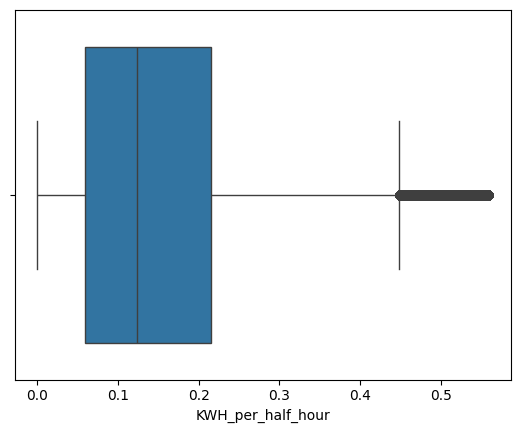

In [16]:
energy01.describe()
# Plotting a boxplot to detect outliers in 'KWH/hh (per half hour)'
plt.figure(figsize=(10, 6))
sns.boxplot(data=energy01, x='KWH_per_half_hour')
plt.title('Boxplot of KWH_per_half_hour')
plt.show()
energy01.describe()
Q1 = energy01['KWH_per_half_hour'].quantile(0.25)
Q3 = energy01['KWH_per_half_hour'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = energy01[(energy01['KWH_per_half_hour'] < lower_bound) |
 (energy01['KWH_per_half_hour'] > upper_bound)]
print(outliers)
energy01_cleaned = energy01[(energy01['KWH_per_half_hour'] >= lower_bound) &
(energy01['KWH_per_half_hour'] <= upper_bound)]

sns.boxplot(data=energy01_cleaned , x='KWH_per_half_hour')
energy01_cleaned.describe()

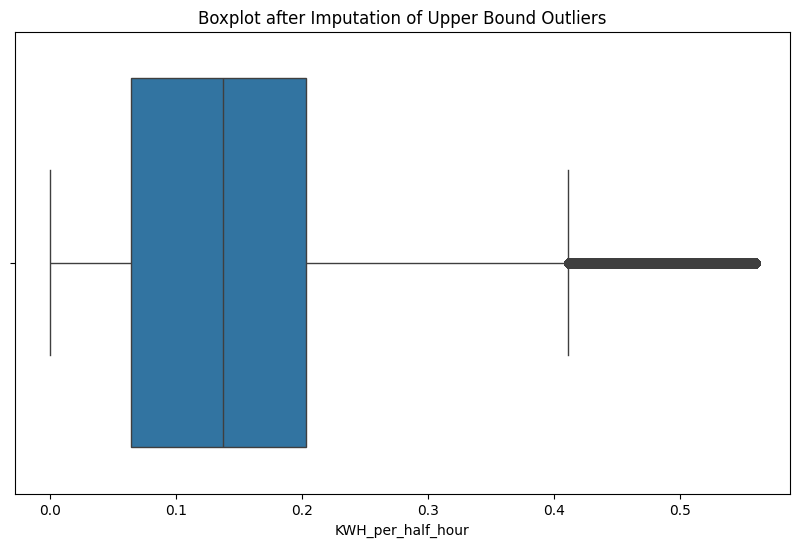

                            DateTime  KWH_per_half_hour  \
count                         928651      928651.000000   
mean   2013-06-29 01:25:23.905321472           0.153915   
min              2013-01-01 00:00:00           0.000000   
25%              2013-03-29 16:00:00           0.064000   
50%              2013-06-27 18:30:00           0.137000   
75%              2013-09-27 02:30:00           0.203000   
max              2013-12-31 23:30:00           0.559000   
std                              NaN           0.120569   

                            Time  
count                     928651  
mean   0 days 11:44:59.264416879  
min              0 days 00:00:00  
25%              0 days 05:30:00  
50%              0 days 11:30:00  
75%              0 days 18:00:00  
max              0 days 23:30:00  
std    0 days 06:55:36.977312454  


In [17]:
#impute outliers
Q1 = energy01['KWH_per_half_hour'].quantile(0.25)
Q3 = energy01['KWH_per_half_hour'].quantile(0.75)
IQR = Q3 - Q1

# Define upper bound outliers
upper_bound = Q3 + 1.5 * IQR

# Step 3: Impute only the upper bound outliers
imputed_value = energy01['KWH_per_half_hour'].median()  # Median value to replace outliers

# Replace only upper bound outliers
energy01['KWH_per_half_hour'] = np.where(energy01['KWH_per_half_hour'] > upper_bound,imputed_value,
    energy01['KWH_per_half_hour']
)

# Step 4: Verify after imputation
plt.figure(figsize=(10, 6))
sns.boxplot(data=energy01, x='KWH_per_half_hour')
plt.title('Boxplot after Imputation of Upper Bound Outliers')
plt.show()

# Step 5: Summary of cleaned data
print(energy01.describe())


Visualizing Energy Consumption by Month

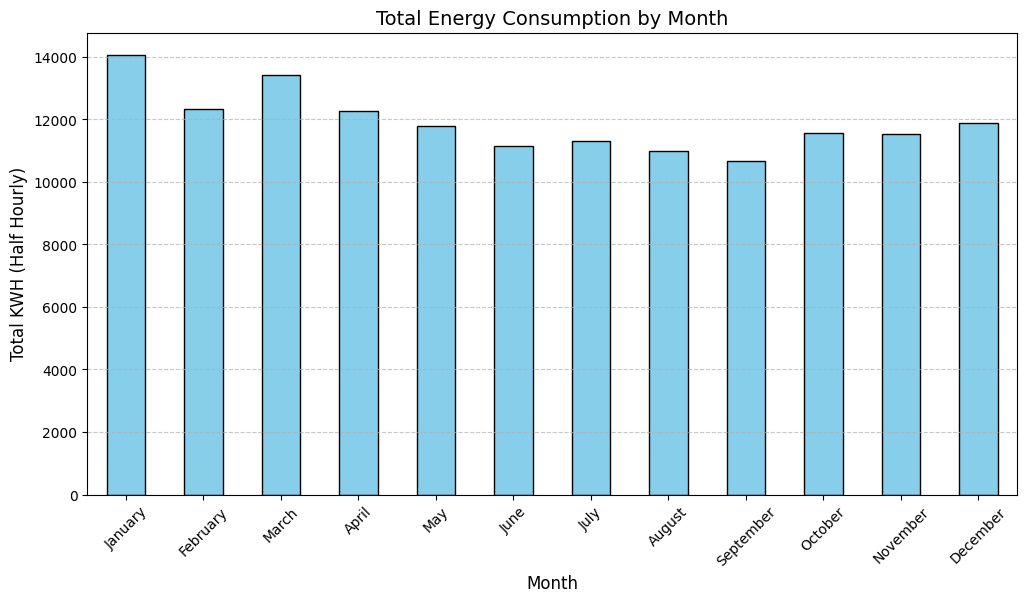

In [117]:
#Aggregate energy consumption by month
monthly_consumption = energy01.groupby('Month')['KWH_per_half_hour'].sum()


plt.figure(figsize=(12, 6))
monthly_consumption.plot(kind='bar', color='skyblue', edgecolor='black')


plt.title("Total Energy Consumption by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total KWH (Half Hourly)", fontsize=12)
plt.xticks(range(12), [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Jan. has the highest Energy Consumption

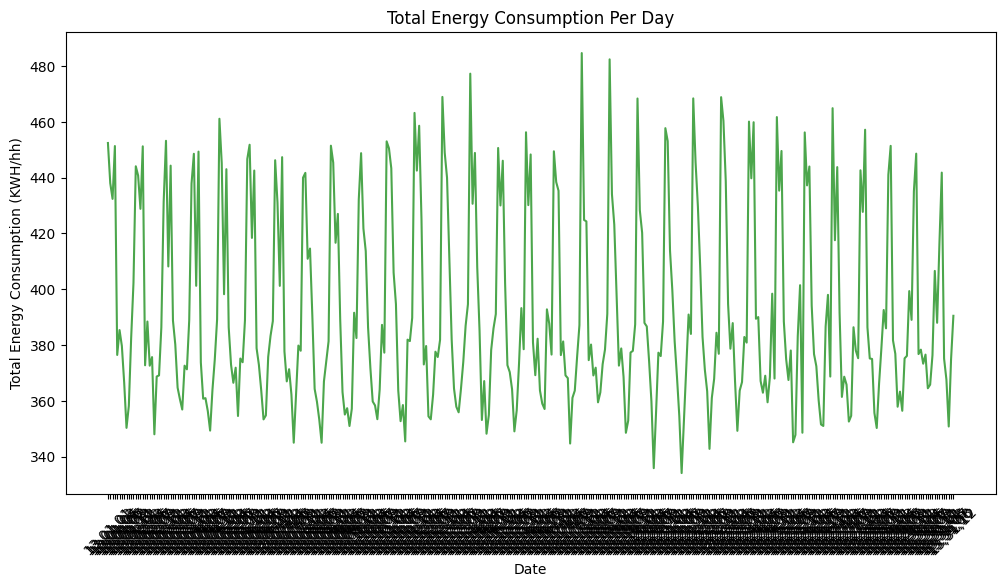

In [19]:
energy_daily = energy01.groupby('Date')['KWH_per_half_hour'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(energy_daily['Date'], energy_daily['KWH_per_half_hour'], alpha=0.7, color='g')
plt.title('Total Energy Consumption Per Day')
plt.xlabel('Date')
plt.ylabel('Total Energy Consumption (KWH/hh)')
plt.xticks(rotation=45)
plt.show()



Analysis and **viz**

count                       928651
mean     0 days 11:44:59.264416879
std      0 days 06:55:36.977312454
min                0 days 00:00:00
25%                0 days 05:30:00
50%                0 days 11:30:00
75%                0 days 18:00:00
max                0 days 23:30:00
Name: Time, dtype: object


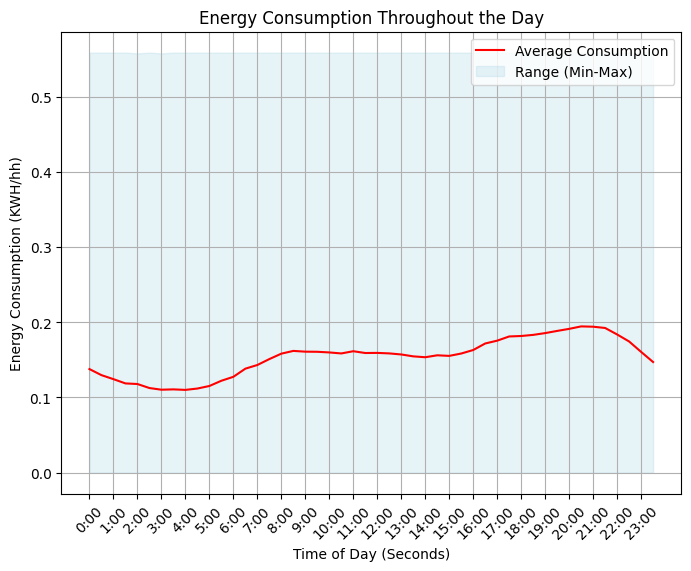

In [132]:
print(energy01['Time'].describe())
# Convert 'Time' from timedelta64 to total seconds
time_analysis = energy01.groupby('Time')['KWH_per_half_hour'].agg(['mean', 'min', 'max'])


time_analysis = time_analysis.reset_index()


time_analysis['Time_seconds'] = time_analysis['Time'].dt.total_seconds()



plt.figure(figsize=(8, 6))
plt.plot(time_analysis['Time_seconds'], time_analysis['mean'], label='Average Consumption', color='red')
plt.fill_between(
    time_analysis['Time_seconds'],
    time_analysis['min'],
    time_analysis['max'],
    color='lightblue', alpha=0.3, label='Range (Min-Max)'
)


plt.title("Energy Consumption Throughout the Day")
plt.xlabel("Time of Day (Seconds)")
plt.ylabel("Energy Consumption (KWH/hh)")
plt.xticks(
    ticks=range(0, 86400, 3600),
    labels=[f"{hour}:00" for hour in range(24)],
    rotation=45
)
plt.legend()
plt.grid()
plt.show()

The observation that energy consumption is high between 17:00  to 21:30

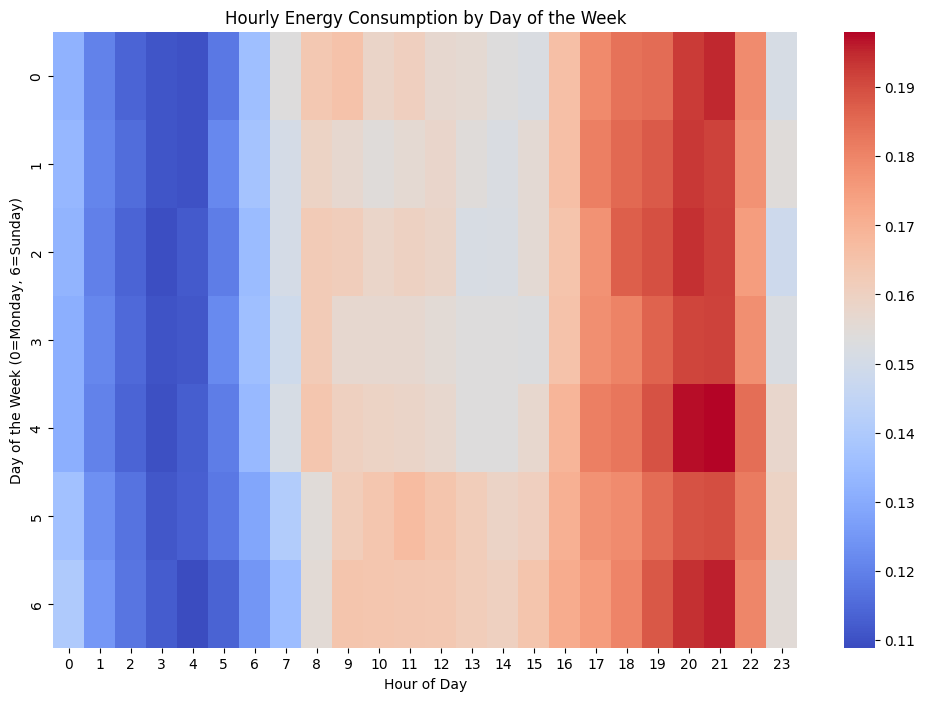

In [81]:
# Extract hour from DateTime
energy01['Hour'] = energy01['DateTime'].dt.hour

# Group by Day of the Week and Hour, then calculate mean consumption
hourly_weekly_consumption = energy01.groupby(['Day_of_Week', 'Hour'])['KWH_per_half_hour'].mean().unstack()

# Plot the heatmap to visualize hourly energy consumption across the week
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_weekly_consumption, cmap="coolwarm", annot=False)
plt.title("Hourly Energy Consumption by Day of the Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of the Week (0=Monday, 6=Sunday)")
plt.show()


**energy consumption tends to peak between 19:00 (7 PM) and 21:00 (9 PM)**

**Energy consumption is lowest between 00:00 (midnight) and 06:00 (6 AM) for all days**

**There is a noticeable increase in energy consumption during the evening hours on Fridays (Day 4) and Saturdays (Day 5)**

In [21]:
# Energy Consumption by Time and Date
pivot_table = energy01.pivot_table(
    values='KWH_per_half_hour',
    index='Date',
    columns='Time',
    aggfunc='mean',
    fill_value=0
)

print("Pivot Table (Partial):")
print(pivot_table.head())


Pivot Table (Partial):
Time      0 days 00:00:00  0 days 00:30:00  0 days 01:00:00  0 days 01:30:00  \
Date                                                                           
13,01,01         0.182982         0.173857         0.176393         0.163018   
13,01,02         0.150291         0.157891         0.132982         0.128345   
13,01,03         0.163764         0.148964         0.127164         0.124236   
13,01,04         0.124582         0.144327         0.132655         0.128364   
13,01,05         0.124463         0.117815         0.119852         0.102204   

Time      0 days 02:00:00  0 days 02:30:00  0 days 03:00:00  0 days 03:30:00  \
Date                                                                           
13,01,01         0.165018         0.136643         0.124714         0.123482   
13,01,02         0.124582         0.121927         0.113127         0.119000   
13,01,03         0.139055         0.134636         0.117418         0.121564   
13,01,04        

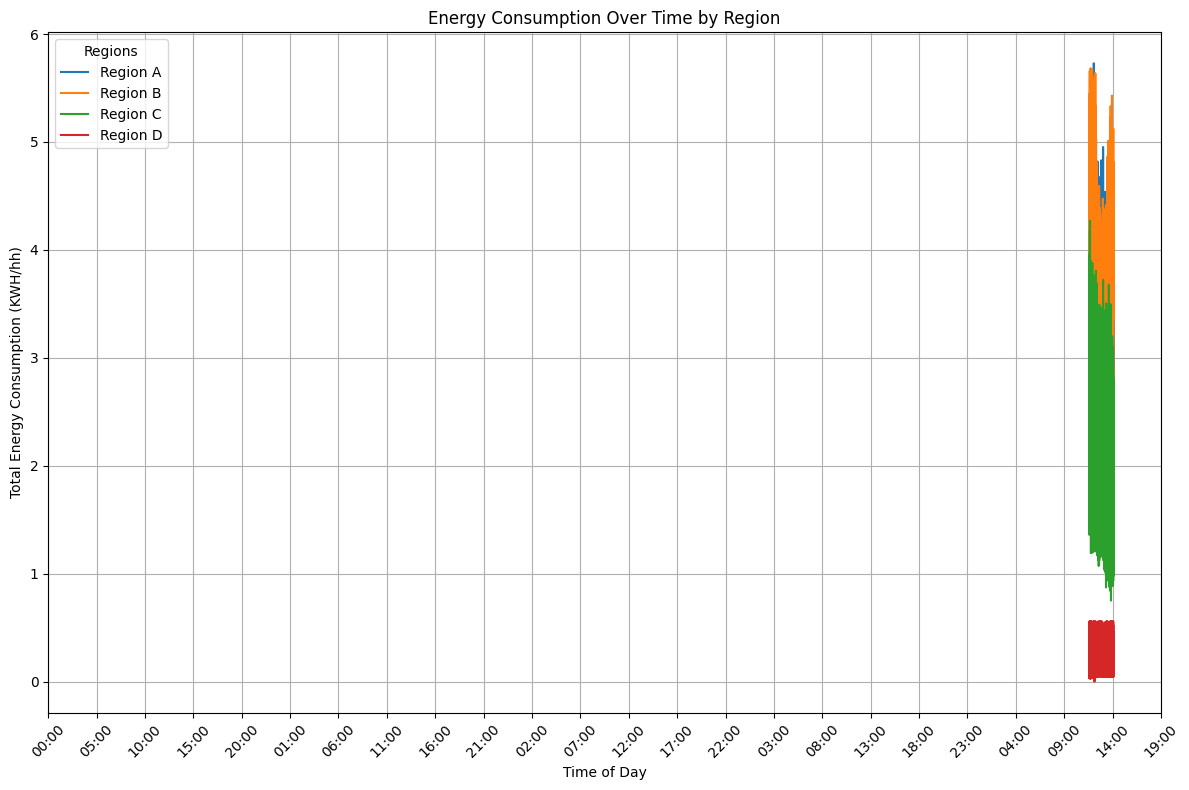

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


# Create pivot table for energy consumption by region and time (DateTime)
pivot_table_region = energy01.pivot_table(
    values='KWH_per_half_hour',  # or use the column for energy consumption
    index='DateTime',  # Ensure this is a datetime column
    columns='region',  # Region for columns
    aggfunc='sum',  # Sum the consumption for each region
    fill_value=0  # Fill missing values with 0
)

# Check if the pivot table is empty
if pivot_table_region.empty:
    print("Warning: The pivot table is empty. Check your data and pivot table creation.")
else:
    plt.figure(figsize=(12, 8))

    for region in pivot_table_region.columns:
        plt.plot(
            pivot_table_region.index,
            pivot_table_region[region],
            label=f"Region {region}"
        )

    plt.title("Energy Consumption Over Time by Region")
    plt.xlabel("Time of Day")
    plt.ylabel("Total Energy Consumption (KWH/hh)")

    # Check if the length of the index is sufficient for the step
    step = len(pivot_table_region.index) // 24
    if step == 0:
        print("Warning: Step size is 0. Adjust the range for xticks.")
        # Adjust the step to 1 or another suitable value
        step = 1

    # Customize xticks: If time intervals are not 1 hour, adjust the labels accordingly
    time_labels = pivot_table_region.index.strftime('%H:%M')  # Format for hour:minute
    plt.xticks(ticks=range(0, len(pivot_table_region.index), step),
               labels=time_labels[::step], rotation=45)  # Adjust rotation for clarity

    plt.legend(title="Regions")
    plt.grid(True)
    plt.tight_layout()
    plt.show()






*  region A & B have the highest power consum.
*  region D has the lowest power consum.










Date
2013-01-01    452.389
2013-01-02    444.040
2013-01-03    431.288
2013-01-04    437.869
2013-01-05    461.075
Name: KWH_per_half_hour, dtype: float64


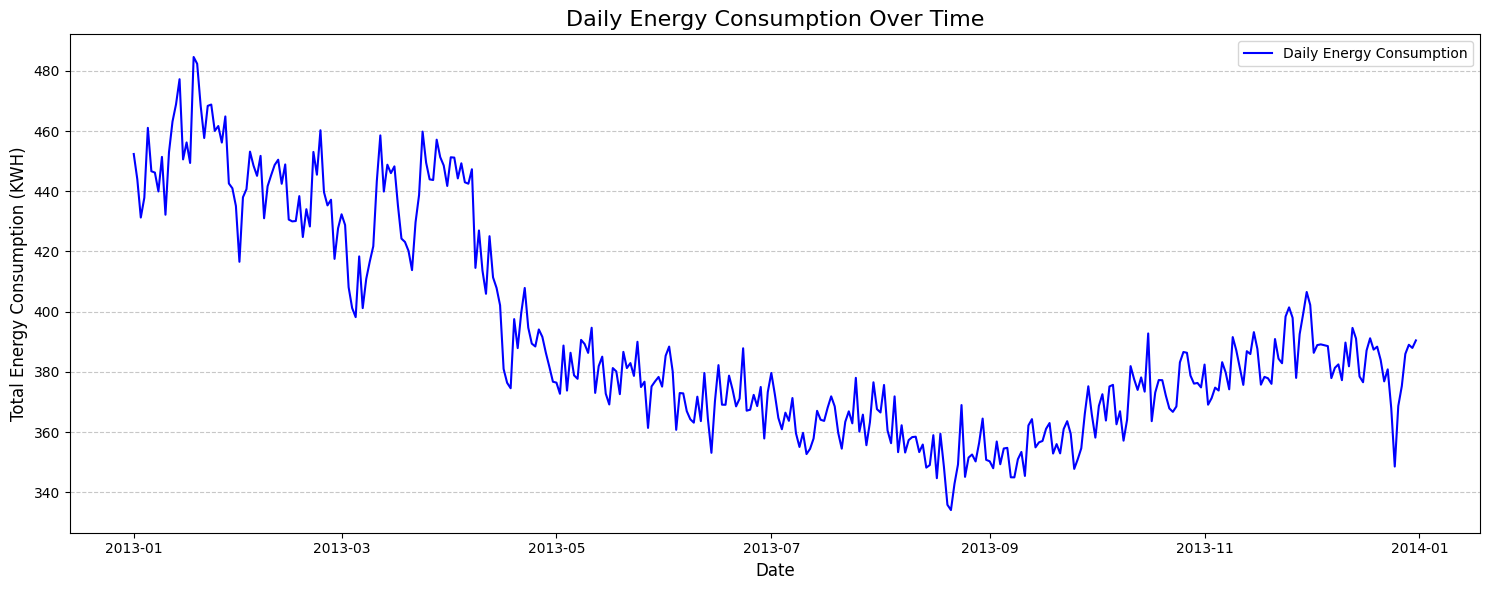

In [129]:
# Aggregate daily energy consumption (sum of KWH per day)
daily_consumption = energy01.groupby('Date')['KWH_per_half_hour'].sum()

# Check the data
print(daily_consumption.head())
import matplotlib.pyplot as plt

# Plot the daily energy consumption
plt.figure(figsize=(15, 6))
plt.plot(daily_consumption.index, daily_consumption.values, label='Daily Energy Consumption', color='blue')

# Customize the chart
plt.title("Daily Energy Consumption Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Energy Consumption (KWH)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


There is a noticeable decline in daily energy consumption during the first half of the year (from January to around July 2013)



*   Null Hypothesis (H₀): Region does not significantly affect energy consumption.
*  Alternative Hypothesis (H₁): Region significantly affects energy consumption



In [24]:
#ANOVA Test
from scipy import stats

# Group data by 'Region' and calculate the mean energy consumption for each region
region_consumption = energy01.groupby('region')['KWH_per_half_hour'].mean()

# Perform One-Way ANOVA to compare means of energy consumption across regions
anova_result = stats.f_oneway(*[group['KWH_per_half_hour'].values for name, group in energy01.groupby('region')])

# Print the p-value from the ANOVA test
print(f"p-value: {anova_result.pvalue}")

# Interpret the result
if anova_result.pvalue < 0.05:
    print("There is a significant difference in energy consumption across regions (Reject H₀).")
else:
    print("There is no significant difference in energy consumption across regions (Fail to reject H₀).")


p-value: 0.0
There is a significant difference in energy consumption across regions (Reject H₀).


In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Perform ANOVA using statsmodels with the renamed column
model = ols('KWH_per_half_hour ~ C(region)', data=energy01).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# If the ANOVA is significant, perform Tukey's HSD test
tukey = pairwise_tukeyhsd(energy01['KWH_per_half_hour'], energy01['region'])
print(tukey.summary())


                 sum_sq        df            F  PR(>F)
C(region)    187.113642       3.0  4350.830759     0.0
Residual   13312.593387  928647.0          NaN     NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B  -0.0085    0.0 -0.0092 -0.0078   True
     A      C   0.0284    0.0  0.0276  0.0293   True
     A      D    0.028    0.0  0.0257  0.0304   True
     B      C   0.0369    0.0   0.036  0.0378   True
     B      D   0.0365    0.0  0.0341  0.0389   True
     C      D  -0.0004 0.9788 -0.0028  0.0021  False
----------------------------------------------------




*  Significant Differences: Regions A and B, A and C, A and D, and B and C show significant differences in energy consumption.

*   No Significant Differences: There are no significant differences between regions B and D, or regions C and D.



regect null hypo. p is too small ,This means that the correlation is statistically significant

In [131]:
# Clean the 'Date' column by replacing commas with slashes
#energy01['Date'] = energy01['Date'].str.replace(',', '/', regex=False)

#  Convert 'Date' to datetime format (with a custom format)
energy01['Date'] = pd.to_datetime(energy01['Date'], format='%y/%d/%m', errors='coerce')

#  Check the first few rows to ensure the conversion is successful
print(energy01[['Date']].head())

#  Extract 'Day_of_Week' after successfully converting to datetime
energy01['Day_of_Week'] = energy01['Date'].dt.dayofweek
print(energy01[['Date', 'Day_of_Week']].head())


             Date
0      2013-01-01
330772 2013-01-01
379224 2013-01-01
396744 2013-01-01
313246 2013-01-01
             Date  Day_of_Week
0      2013-01-01            1
330772 2013-01-01            1
379224 2013-01-01            1
396744 2013-01-01            1
313246 2013-01-01            1


In [85]:
# Check the distribution of energy consumption by day of the week
daily_distribution = energy01.groupby('Day_of_Week')['KWH_per_half_hour'].describe()
print(daily_distribution)
energy01.info()


                count      mean       std  min    25%    50%    75%    max
Day_of_Week                                                               
0            132215.0  0.153830  0.120731  0.0  0.065  0.137  0.202  0.559
1            134857.0  0.153413  0.120972  0.0  0.064  0.135  0.202  0.559
2            132298.0  0.153287  0.120640  0.0  0.064  0.135  0.202  0.559
3            132326.0  0.152740  0.120009  0.0  0.064  0.136  0.199  0.559
4            132324.0  0.154735  0.120923  0.0  0.065  0.137  0.205  0.559
5            132325.0  0.154689  0.119648  0.0  0.065  0.137  0.206  0.559
6            132306.0  0.154720  0.121033  0.0  0.064  0.137  0.206  0.559
<class 'pandas.core.frame.DataFrame'>
Index: 928651 entries, 0 to 734878
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   cell_id            928651 non-null  object         
 1   DateTime           928651 non-null  datetim

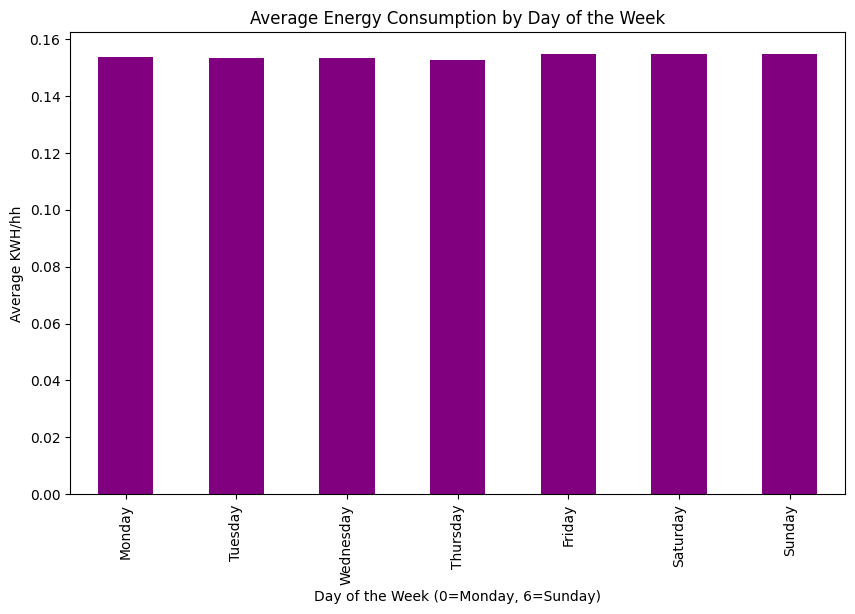

In [28]:
# Average energy consumption by day of the week
weekly_consumption = energy01.groupby('Day_of_Week')['KWH_per_half_hour'].mean()

plt.figure(figsize=(10, 6))
weekly_consumption.plot(kind='bar', color='purple')
plt.title("Average Energy Consumption by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Average KWH/hh")
orientation='vertical'
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.show()


friday is the highest day in power cons.

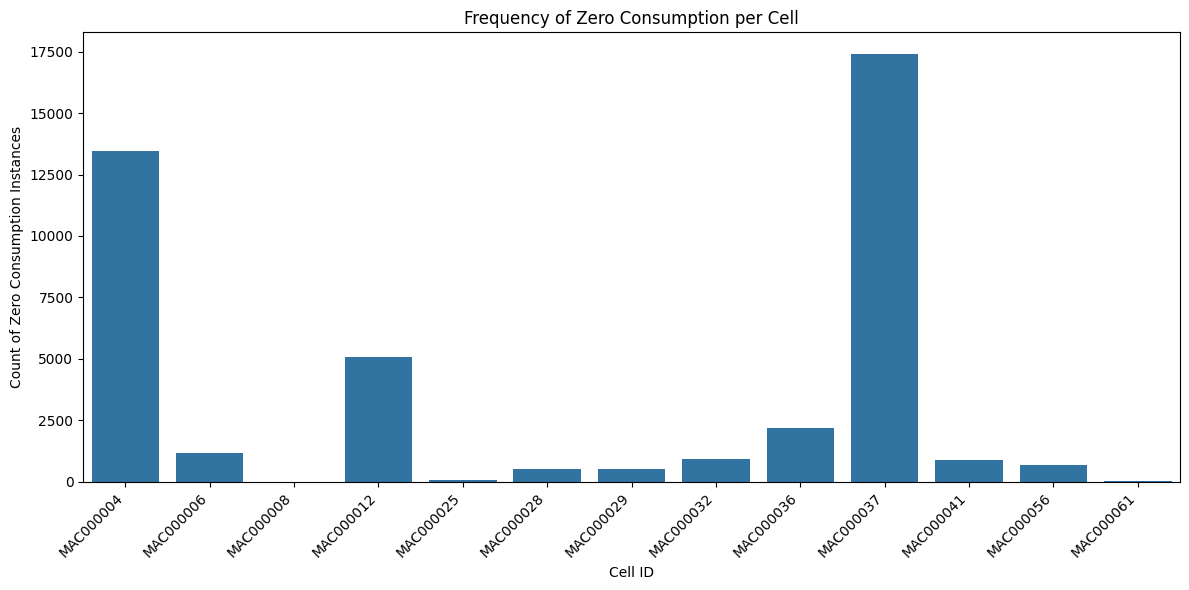

In [29]:
#cells that have low cons.
zero_consumption = energy01[energy01['KWH_per_half_hour'] == 0]

# 2. Group by cell_id and count occurrences of zero consumption
zero_consumption_counts = zero_consumption.groupby('cell_id')['KWH_per_half_hour'].count().reset_index()
zero_consumption_counts.rename(columns={'KWH_per_half_hour': 'Zero_Consumption_Count'}, inplace=True)

# 3. Visualize the frequency of zero consumption per cell
plt.figure(figsize=(12, 6))
sns.barplot(x='cell_id', y='Zero_Consumption_Count', data=zero_consumption_counts)
plt.title('Frequency of Zero Consumption per Cell')
plt.xlabel('Cell ID')
plt.ylabel('Count of Zero Consumption Instances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [30]:
energy01

,cell_id,DateTime,KWH_per_half_hour,site_id,region,Time,Date,Year,Day,Month,FormattedDate,DateTimeFormatted,Time_seconds,Day_of_Week
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,0 days 00:00:00,2013-01-01,2013,01,01,01-01-2013,01-01-2013 00:00:00,0.0,1
659667,MAC000049,2013-01-01 00:00:00,0.137,E,A,0 days 00:00:00,2013-01-01,2013,01,01,01-01-2013,01-01-2013 00:00:00,0.0,1
677199,MAC000050,2013-01-01 00:00:00,0.547,D,A,0 days 00:00:00,2013-01-01,2013,01,01,01-01-2013,01-01-2013 00:00:00,0.0,1
154745,MAC000012,2013-01-01 00:00:00,0.000,E,A,0 days 00:00:00,2013-01-01,2013,01,01,01-01-2013,01-01-2013 00:00:00,0.0,1
682291,MAC000053,2013-01-01 00:00:00,0.144,F,C,0 days 00:00:00,2013-01-01,2013,01,01,01-01-2013,01-01-2013 00:00:00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119681,MAC000009,2013-12-31 23:30:00,0.132,L,B,0 days 23:30:00,2013-12-31,2013,31,12,31-12-2013,31-12-2013 23:30:00,84600.0,1
208059,MAC000018,2013-12-31 23:30:00,0.134,E,A,0 days 23:30:00,2013-12-31,2013,31,12,31-12-2013,31-12-2013 23:30:00,84600.0,1
699818,MAC000053,2013-12-31 23:30:00,0.344,F,C,0 days 23:30:00,2013-12-31,2013,31,12,31-12-2013,31-12-2013 23:30:00,84600.0,1
243121,MAC000020,2013-12-31 23:30:00,0.118,J,C,0 days 23:30:00,2013-12-31,2013,31,12,31-12-2013,31-12-2013 23:30:00,84600.0,1


# Demand

In [31]:
#data connection
demand=pd.read_excel("/content/drive/MyDrive/datascience/Data/Final Project/Demand.xlsx")
demand.info()
demand
#data cleaning and transformation-----------------------------------
demand['Demand'].unique() #'Normal', 'Low', 'Normall', 'High', 'normal', 'high'
# Check for duplicates
print(f"Duplicate rows: {demand.duplicated().sum()}") # no dupl.

# Unique values in 'Demand'
print(demand['Demand'].value_counts())
# Define a mapping for corrections
correction_mapping = {
    'normal': 'Normal',
    'high': 'High',
    'Normall':'Normal'
}

# Replace incorrect values
demand['Demand'] = demand['Demand'].replace(correction_mapping)
print(demand['Demand'].value_counts())

print(demand.isnull().sum()) #no null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DemandDateTime  17520 non-null  datetime64[ns]
 1   Demand          17520 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 273.9+ KB
Duplicate rows: 0
Demand
Normal     15069
Low         1660
High         785
high           3
normal         2
Normall        1
Name: count, dtype: int64
Demand
Normal    15072
Low        1660
High        788
Name: count, dtype: int64
DemandDateTime    0
Demand            0
dtype: int64


In [32]:
# Confirm datetime format
demand['DemandDateTime'] = pd.to_datetime(demand['DemandDateTime'], errors='coerce')

# Identify invalid datetime values
invalid_dates = demand[demand['DemandDateTime'].isna()]
print(invalid_dates)
demand.head(10)

Empty DataFrame
Columns: [DemandDateTime, Demand]
Index: []


,DemandDateTime,Demand
0,2013-01-01 00:00:00,Normal
1,2013-01-01 00:30:00,Normal
2,2013-01-01 01:00:00,Normal
3,2013-01-01 01:30:00,Normal
4,2013-01-01 02:00:00,Normal
5,2013-01-01 02:30:00,Normal
6,2013-01-01 03:00:00,Normal
7,2013-01-01 03:30:00,Normal
8,2013-01-01 04:00:00,Normal
9,2013-01-01 04:30:00,Normal


In [33]:

# Split DemandDateTime into Date and Time columns
demand[['Date', 'Time']] = demand['DemandDateTime'].astype(str).str.split(' ', expand=True)

# Convert 'Date' to datetime format
demand['Date'] = pd.to_datetime(demand['Date'], format='%Y-%m-%d', errors='coerce')

# Handle any invalid dates (if present)
invalid_dates = demand[demand['Date'].isna()]
if not invalid_dates.empty:
    print(f"Invalid dates found:\n{invalid_dates}")
    # Drop rows with invalid dates
    demand = demand.dropna(subset=['Date'])

# Convert 'Time' to timedelta format
demand['Time'] = pd.to_timedelta(demand['Time'])

demand['Time'] = demand['Time'].dt.components.apply(lambda x: f"{x.hours:02}:{x.minutes:02}:{x.seconds:02}", axis=1)



print(demand.info())
print(demand.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DemandDateTime  17520 non-null  datetime64[ns]
 1   Demand          17520 non-null  object        
 2   Date            17520 non-null  datetime64[ns]
 3   Time            17520 non-null  object        
dtypes: datetime64[ns](2), object(2)
memory usage: 547.6+ KB
None
       DemandDateTime  Demand       Date      Time
0 2013-01-01 00:00:00  Normal 2013-01-01  00:00:00
1 2013-01-01 00:30:00  Normal 2013-01-01  00:30:00
2 2013-01-01 01:00:00  Normal 2013-01-01  01:00:00
3 2013-01-01 01:30:00  Normal 2013-01-01  01:30:00
4 2013-01-01 02:00:00  Normal 2013-01-01  02:00:00


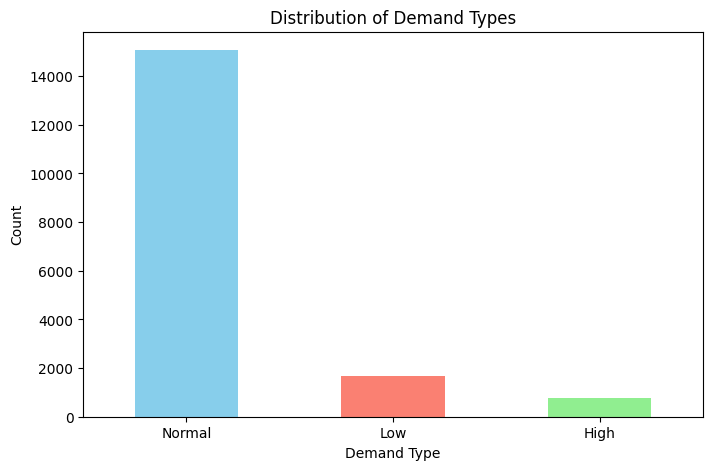

In [34]:
#analyss-------------
import matplotlib.pyplot as plt

# Count the occurrences of each demand type
demand_count = demand['Demand'].value_counts()

# Plot the distribution of demand
plt.figure(figsize=(8, 5))
demand_count.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Demand Types')
plt.xlabel('Demand Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


the most is Normal

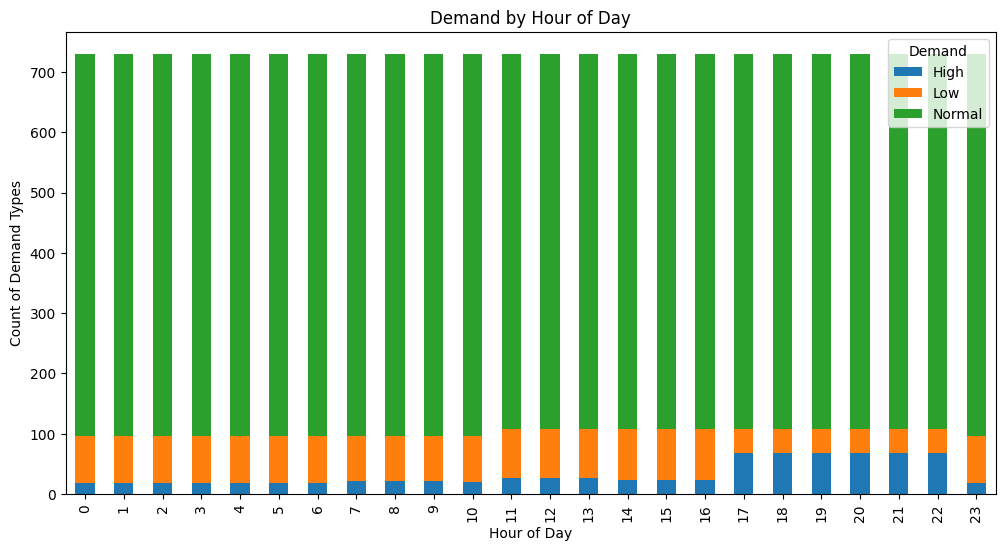

In [35]:
# Convert 'Time' to timedelta format
demand['Time'] = pd.to_timedelta(demand['Time'])

# Extract the hour from the 'Time' column before converting to string
demand['Hour'] = demand['Time'].dt.components.hours

# Now you can format the 'Time' column as a string if needed
demand['Time'] = demand['Time'].dt.components.apply(lambda x: f"{x.hours:02}:{x.minutes:02}:{x.seconds:02}", axis=1)
# Group by hour and demand type
demand_by_hour = demand.groupby('Hour')['Demand'].value_counts().unstack().fillna(0)

# Plot demand by hour of the day
demand_by_hour.plot(figsize=(12, 6), kind='bar', stacked=True)
plt.title('Demand by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Demand Types')
plt.show()

In [36]:
# pivot table to count each demand type by date
pivot_table_date = demand.pivot_table(
    values='Hour',
    index='Date',
    columns='Demand',
    aggfunc='count',
    fill_value=0
)

# Display the pivot table
print(pivot_table_date)


Demand      High  Low  Normal
Date                         
2013-01-01     0    0      48
2013-01-02     0    0      48
2013-01-03     0    0      48
2013-01-04     0    6      42
2013-01-05     0    0      48
...          ...  ...     ...
2013-12-27    12   26      10
2013-12-28    14   10      24
2013-12-29    10    0      38
2013-12-30     0    0      48
2013-12-31     0    0      48

[365 rows x 3 columns]


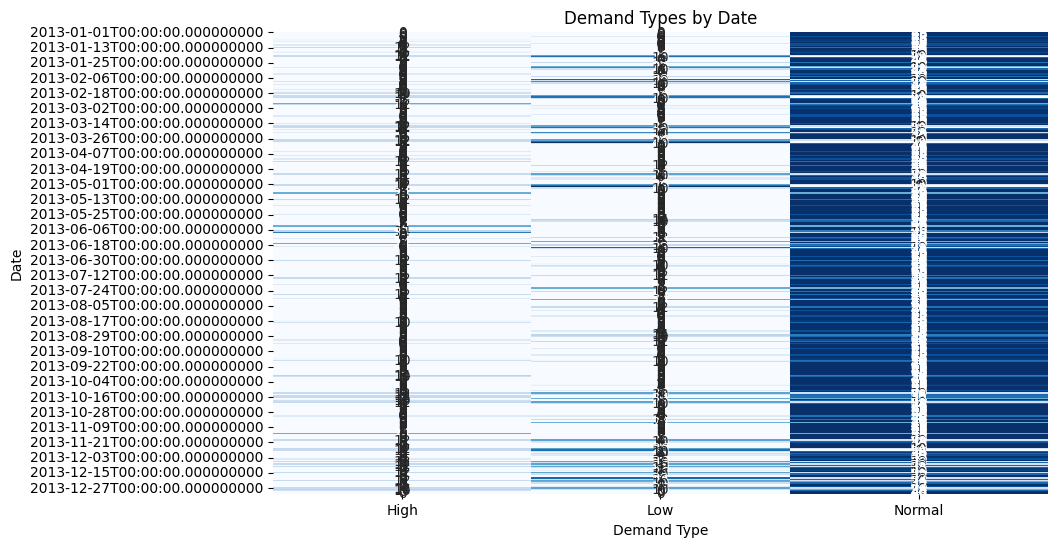

In [38]:
import seaborn as sns

# Plot the pivot table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_date, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Demand Types by Date')
plt.xlabel('Demand Type')
plt.ylabel('Date')
plt.show()


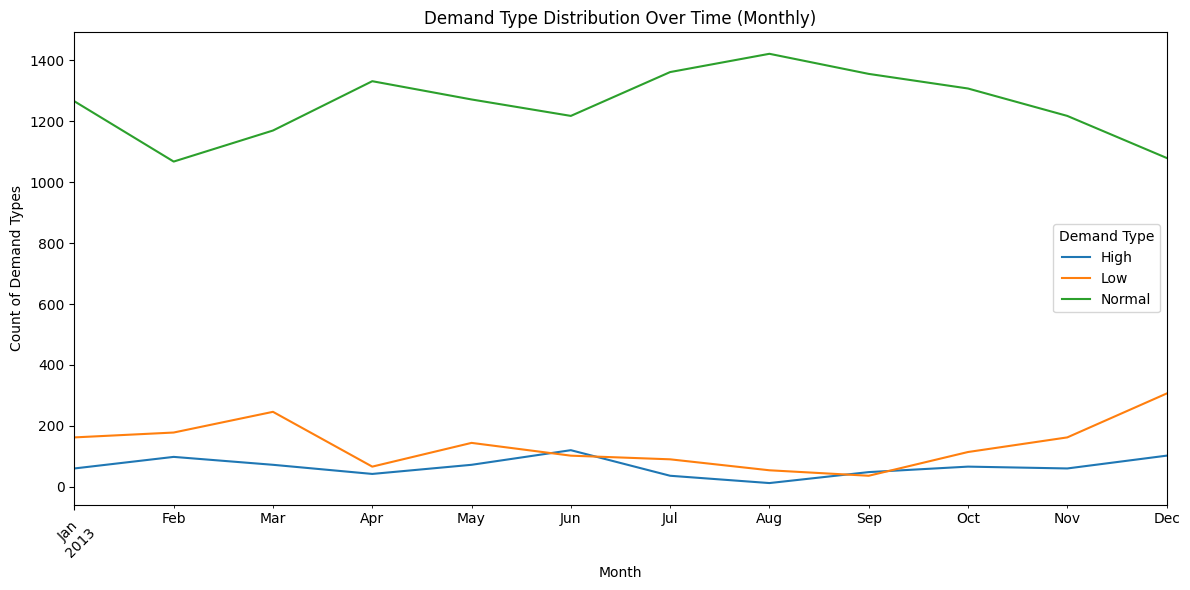

In [39]:
# Extracting the month and year from the Date column for aggregation
demand['Year_Month'] = demand['Date'].dt.to_period('M')

# Creating a pivot table that shows the count of each demand type by Year-Month
pivot_table_month = demand.pivot_table(
    values='Hour',
    index='Year_Month',
    columns='Demand',
    aggfunc='size',
    fill_value=0
)

# Plotting the trend over time
pivot_table_month.plot(kind='line', figsize=(12, 6))

plt.title('Demand Type Distribution Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Count of Demand Types')
plt.xticks(rotation=45)
plt.legend(title='Demand Type')
plt.tight_layout()
plt.show()


In [40]:
print(energy01['DateTime'].dtype)
print(demand['DemandDateTime'].dtype)
print(energy01['DateTime'].min(), energy01['DateTime'].max())
print(demand['DemandDateTime'].min(), demand['DemandDateTime'].max())

datetime64[ns]
datetime64[ns]
2013-01-01 00:00:00 2013-12-31 23:30:00
2013-01-01 00:00:00 2013-12-31 23:30:00


merging

In [41]:
#preparing data before mergingg
print(energy01.duplicated(subset='DateTime').sum()) #1362732
print(energy01.info())
#energy01 = energy01.drop_duplicates(subset='DateTime')
print(energy01.info())
print(energy01.duplicated(subset='DateTime').sum())
demand.info()

911131
<class 'pandas.core.frame.DataFrame'>
Index: 928651 entries, 0 to 734878
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   cell_id            928651 non-null  object         
 1   DateTime           928651 non-null  datetime64[ns] 
 2   KWH_per_half_hour  928651 non-null  float64        
 3   site_id            928651 non-null  object         
 4   region             928651 non-null  object         
 5   Time               928651 non-null  timedelta64[ns]
 6   Date               928651 non-null  datetime64[ns] 
 7   Year               928651 non-null  object         
 8   Day                928651 non-null  object         
 9   Month              928651 non-null  object         
 10  FormattedDate      928651 non-null  object         
 11  DateTimeFormatted  928651 non-null  object         
 12  Time_seconds       928651 non-null  float64        
 13  Day_of_Week        928651 n

In [42]:
print(energy01['DateTime'].dtype)
print(demand['DemandDateTime'].dtype)
print(demand['DemandDateTime'].tail())
print(energy01['DateTime'].tail())

print(energy01['DateTime'].isnull().sum())
print(demand['DemandDateTime'].isnull().sum())
print(energy01[['DateTime']].head())
print(demand[['DemandDateTime', 'Demand']].head())

datetime64[ns]
datetime64[ns]
17515   2013-12-31 21:30:00
17516   2013-12-31 22:00:00
17517   2013-12-31 22:30:00
17518   2013-12-31 23:00:00
17519   2013-12-31 23:30:00
Name: DemandDateTime, dtype: datetime64[ns]
119681   2013-12-31 23:30:00
208059   2013-12-31 23:30:00
699818   2013-12-31 23:30:00
243121   2013-12-31 23:30:00
734878   2013-12-31 23:30:00
Name: DateTime, dtype: datetime64[ns]
0
0
         DateTime
0      2013-01-01
659667 2013-01-01
677199 2013-01-01
154745 2013-01-01
682291 2013-01-01
       DemandDateTime  Demand
0 2013-01-01 00:00:00  Normal
1 2013-01-01 00:30:00  Normal
2 2013-01-01 01:00:00  Normal
3 2013-01-01 01:30:00  Normal
4 2013-01-01 02:00:00  Normal


In [86]:
# Merge the datasets on DateTime and DemandDateTime using an exact match
merged_data = pd.merge(energy01, demand, left_on='DateTime', right_on='DemandDateTime', how='inner')

# Check the first few rows to verify the merge
print(merged_data[['DateTime', 'DemandDateTime', 'Demand']].head(10))
# Inspect the merged dataset
print(merged_data.info())
merged_data.drop(columns=['DateTimeFormatted'], inplace=True)

merged_data.drop(columns=['FormattedDate'], inplace=True)

    DateTime DemandDateTime  Demand
0 2013-01-01     2013-01-01  Normal
1 2013-01-01     2013-01-01  Normal
2 2013-01-01     2013-01-01  Normal
3 2013-01-01     2013-01-01  Normal
4 2013-01-01     2013-01-01  Normal
5 2013-01-01     2013-01-01  Normal
6 2013-01-01     2013-01-01  Normal
7 2013-01-01     2013-01-01  Normal
8 2013-01-01     2013-01-01  Normal
9 2013-01-01     2013-01-01  Normal
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928651 entries, 0 to 928650
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   cell_id            928651 non-null  object         
 1   DateTime           928651 non-null  datetime64[ns] 
 2   KWH_per_half_hour  928651 non-null  float64        
 3   site_id            928651 non-null  object         
 4   region             928651 non-null  object         
 5   Time_x             928651 non-null  timedelta64[ns]
 6   Date_x             928651 non-nu

In [87]:
merged_data.isnull().sum()
columns_to_drop = ['Time_x', 'Date_x', 'Month', 'Time_seconds', 'Date_y', 'Time_y', 'Year_Month']
merged_data.drop(columns=columns_to_drop, inplace=True)
#merged_data.info()
merged_data.duplicated().sum()
normal_demand_records = merged_data[merged_data['Demand'] == 'Low']
num_normal_demand_records = len(normal_demand_records)
num_normal_demand_records
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928651 entries, 0 to 928650
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   cell_id            928651 non-null  object        
 1   DateTime           928651 non-null  datetime64[ns]
 2   KWH_per_half_hour  928651 non-null  float64       
 3   site_id            928651 non-null  object        
 4   region             928651 non-null  object        
 5   Year               928651 non-null  object        
 6   Day                928651 non-null  object        
 7   Day_of_Week        928651 non-null  int32         
 8   Hour_x             928651 non-null  int32         
 9   DemandDateTime     928651 non-null  datetime64[ns]
 10  Demand             928651 non-null  object        
 11  Hour_y             928651 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int32(2), int64(1), object(6)
memory usage: 77.9+ MB


In [102]:
# Group data by Day of Week, Hour, and Demand, and calculate the mean consumption
demand_hourly_consumption = merged_data.groupby(['Day_of_Week', 'Hour_y', 'Demand'])['KWH_per_half_hour'].mean().reset_index()

print(demand_hourly_consumption.head())  # Check the structure of the grouped data


   Day_of_Week  Hour_y  Demand  KWH_per_half_hour
0            0       0    High           0.133093
1            0       0     Low           0.139441
2            0       0  Normal           0.130434
3            0       1    High           0.121084
4            0       1     Low           0.122387


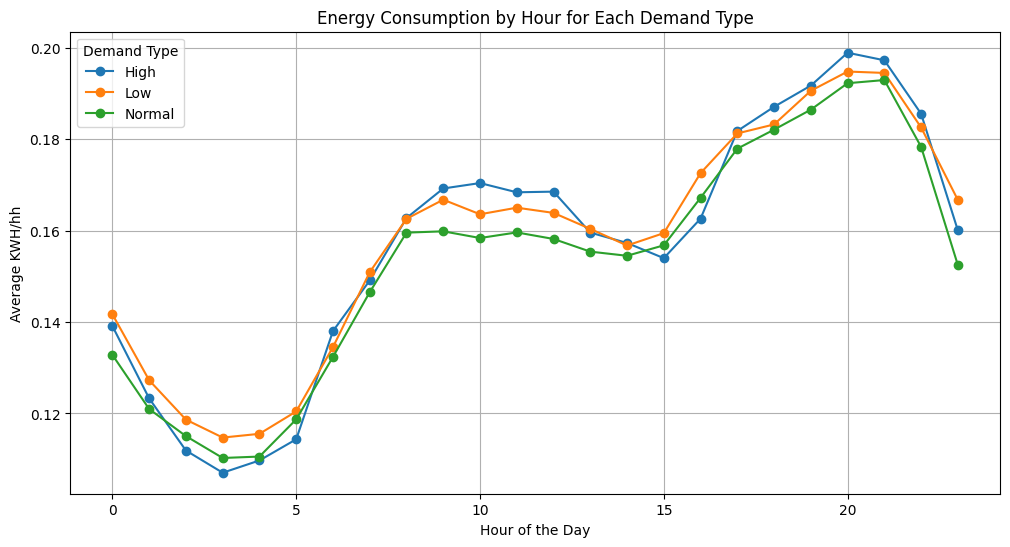

In [103]:
# Pivot the grouped data for line plot creation
lineplot_data = demand_hourly_consumption.groupby(['Hour_y', 'Demand'])['KWH_per_half_hour'].mean().unstack()

# Create a line plot for demand types across hours
plt.figure(figsize=(12, 6))
lineplot_data.plot(ax=plt.gca(), marker='o')
plt.title("Energy Consumption by Hour for Each Demand Type")
plt.xlabel("Hour of the Day")
plt.ylabel("Average KWH/hh")
plt.legend(title="Demand Type")
plt.grid(True)
plt.show()


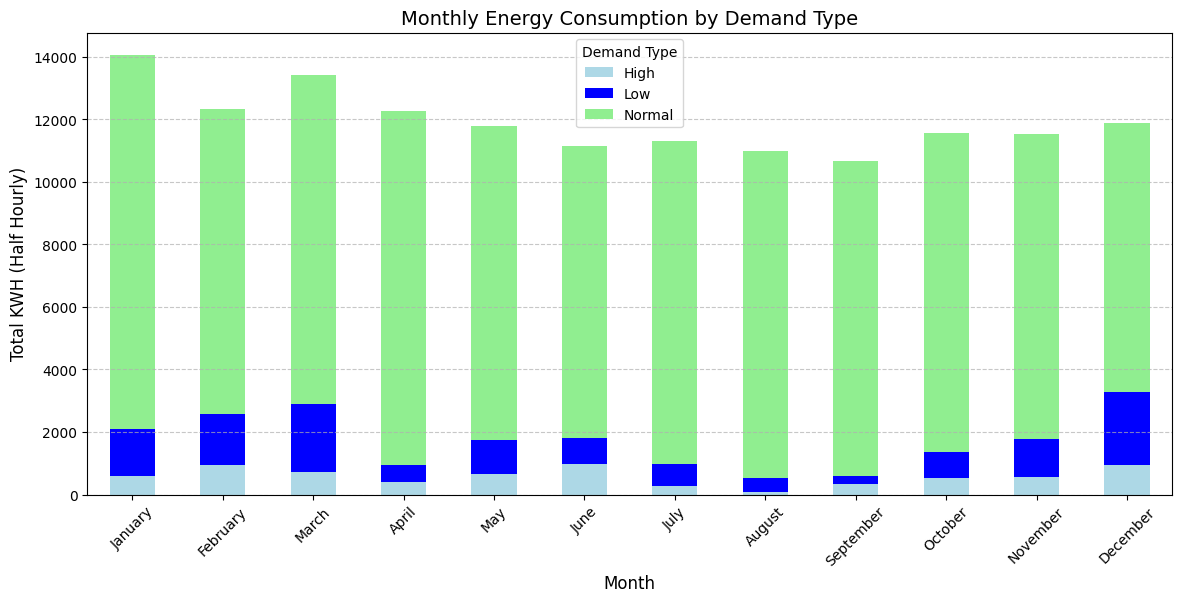

In [125]:
# Aggregate energy consumption by month and demand type
merged_data['Month_y'] =merged_data['DemandDateTime'].dt.month
monthly_demand_consumption = merged_data.groupby(['Month_y', 'Demand'])['KWH_per_half_hour'].sum().unstack()

# Plot the data
monthly_demand_consumption.plot(kind='bar', stacked=True, figsize=(14, 6), color=['lightblue', 'blue', 'lightgreen'])
plt.title("Monthly Energy Consumption by Demand Type", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total KWH (Half Hourly)", fontsize=12)
plt.xticks(range(12), [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.legend(title="Demand Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [88]:
#cost
# Define the price mapping based on demand
price_mapping = {
    'High': 77.21,
    'Normal': 19.46,
    'Low': 6.89
}

# Map the price to the 'Demand' column
merged_data['Price_per_KWH'] = merged_data['Demand'].map(price_mapping)

# Calculate the cost: KWH_per_half_hour * Price_per_KWH
merged_data['Cost'] = (merged_data['KWH_per_half_hour'] * merged_data['Price_per_KWH'])/100

# Display the first few rows to check the results
print(merged_data[['DateTime', 'Demand', 'KWH_per_half_hour', 'Price_per_KWH', 'Cost']].tail(10))
merged_data['KWH_per_half_hour'].describe()

                  DateTime  Demand  KWH_per_half_hour  Price_per_KWH      Cost
928641 2013-12-31 23:30:00  Normal              0.000          19.46  0.000000
928642 2013-12-31 23:30:00  Normal              0.346          19.46  0.067332
928643 2013-12-31 23:30:00  Normal              0.060          19.46  0.011676
928644 2013-12-31 23:30:00  Normal              0.137          19.46  0.026660
928645 2013-12-31 23:30:00  Normal              0.047          19.46  0.009146
928646 2013-12-31 23:30:00  Normal              0.132          19.46  0.025687
928647 2013-12-31 23:30:00  Normal              0.134          19.46  0.026076
928648 2013-12-31 23:30:00  Normal              0.344          19.46  0.066942
928649 2013-12-31 23:30:00  Normal              0.118          19.46  0.022963
928650 2013-12-31 23:30:00  Normal              0.108          19.46  0.021017


,KWH_per_half_hour
count,928651.000000
mean,0.153915
std,0.120569
min,0.000000
25%,0.064000
50%,0.137000
75%,0.203000
max,0.559000


In [121]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928651 entries, 0 to 928650
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   cell_id                    928651 non-null  object        
 1   DateTime                   928651 non-null  datetime64[ns]
 2   KWH_per_half_hour          928651 non-null  float64       
 3   site_id                    928651 non-null  object        
 4   region                     928651 non-null  object        
 5   Year                       928651 non-null  object        
 6   Day                        928651 non-null  object        
 7   Day_of_Week                928651 non-null  int32         
 8   Hour_x                     928651 non-null  int32         
 9   DemandDateTime             928651 non-null  datetime64[ns]
 10  Demand                     928651 non-null  object        
 11  Hour_y                     928651 non-null  int64   

i choosed threshold 0.12 above 25%

In [89]:
# Assuming energy01 is part of merged_data, or merged_data is the final dataset you're working with.

# Set threshold for low energy consumption
threshold = 0.12  # Based on the 25th percentile (Low Consumption)

# Create a new column 'Updated_KWH_per_half_hour' based on the threshold logic
merged_data['Updated_KWH_per_half_hour'] = merged_data['KWH_per_half_hour'].apply(
    lambda x: x if x >= threshold else 0
)

# Verify the updated data (check the first few rows)
print(merged_data[['DateTime', 'KWH_per_half_hour', 'Updated_KWH_per_half_hour']].head(100))

# Define price mappings for different demand categories
price_map = {
    'High': 77.21,   # Price in pence per kWh
    'Normal': 19.46,  # Price in pence per kWh
    'Low': 6.89       # Price in pence per kWh
}

# Ensure 'Demand' column exists and contains valid categories
print(merged_data['Demand'].unique())  # Ensure values are: 'High', 'Normal', 'Low'

# Create a new 'Cost' column by multiplying Updated_KWH_per_half_hour by the appropriate price
merged_data['newcost'] = (merged_data['Updated_KWH_per_half_hour'] * merged_data['Demand'].map(price_map))/100

# Check the new 'Cost' column and the first few rows to verify
print(merged_data[['DateTime', 'KWH_per_half_hour', 'Updated_KWH_per_half_hour', 'Demand', 'newcost']].head(100))


              DateTime  KWH_per_half_hour  Updated_KWH_per_half_hour
0  2013-01-01 00:00:00              0.219                      0.219
1  2013-01-01 00:00:00              0.137                      0.137
2  2013-01-01 00:00:00              0.547                      0.547
3  2013-01-01 00:00:00              0.000                      0.000
4  2013-01-01 00:00:00              0.144                      0.144
..                 ...                ...                        ...
95 2013-01-01 00:30:00              0.000                      0.000
96 2013-01-01 00:30:00              0.000                      0.000
97 2013-01-01 00:30:00              0.071                      0.000
98 2013-01-01 00:30:00              0.386                      0.386
99 2013-01-01 00:30:00              0.137                      0.137

[100 rows x 3 columns]
['Normal' 'Low' 'High']
              DateTime  KWH_per_half_hour  Updated_KWH_per_half_hour  Demand  \
0  2013-01-01 00:00:00              0.219   

In [90]:
# Sum of the 'Cost' column (original cost)
sum_original_cost = merged_data['Cost'].sum()

# Sum of the 'new_cost' column (updated cost after applying threshold)
sum_new_cost = merged_data['newcost'].sum()
print(round(sum_original_cost,2))
print(round(sum_new_cost,2))

30210.76
25275.01


In [91]:
#sum of consumption
sum_original_consumption = merged_data['KWH_per_half_hour'].sum()
sum_new_consumption = merged_data['Updated_KWH_per_half_hour'].sum()

print(round(sum_original_consumption, 2))
print(round(sum_new_consumption, 2))


142933.18
118838.92


In [92]:
#savings
ConsSaving=sum_original_consumption-sum_new_consumption
CostSaving=sum_original_cost-sum_new_cost
print(round(ConsSaving,2))
print(round(CostSaving,2))

24094.27
4935.75


we saved almost 24094 KWh in energy consumprtion




we saved 4935 EGP in cost

In [93]:
# Descriptive statistics for energy consumption
print("Original Energy Consumption Statistics:")
print(merged_data['KWH_per_half_hour'].describe())

print("Updated Energy Consumption Statistics:")
print(merged_data['Updated_KWH_per_half_hour'].describe())

# Descriptive statistics for cost
print("Original Cost Statistics:")
print(merged_data['Cost'].describe())

print("New Cost Statistics:")
print(merged_data['newcost'].describe())


Original Energy Consumption Statistics:
count    928651.000000
mean          0.153915
std           0.120569
min           0.000000
25%           0.064000
50%           0.137000
75%           0.203000
max           0.559000
Name: KWH_per_half_hour, dtype: float64
Updated Energy Consumption Statistics:
count    928651.000000
mean          0.127969
std           0.140699
min           0.000000
25%           0.000000
50%           0.137000
75%           0.203000
max           0.559000
Name: Updated_KWH_per_half_hour, dtype: float64
Original Cost Statistics:
count    928651.000000
mean          0.032532
std           0.037388
min           0.000000
25%           0.011092
50%           0.025103
75%           0.039698
max           0.431604
Name: Cost, dtype: float64
New Cost Statistics:
count    928651.000000
mean          0.027217
std           0.039991
min           0.000000
25%           0.000000
50%           0.024130
75%           0.038531
max           0.431604
Name: newcost, dtype: f

Reduction in Energy Consumption: 24094.27 KWh


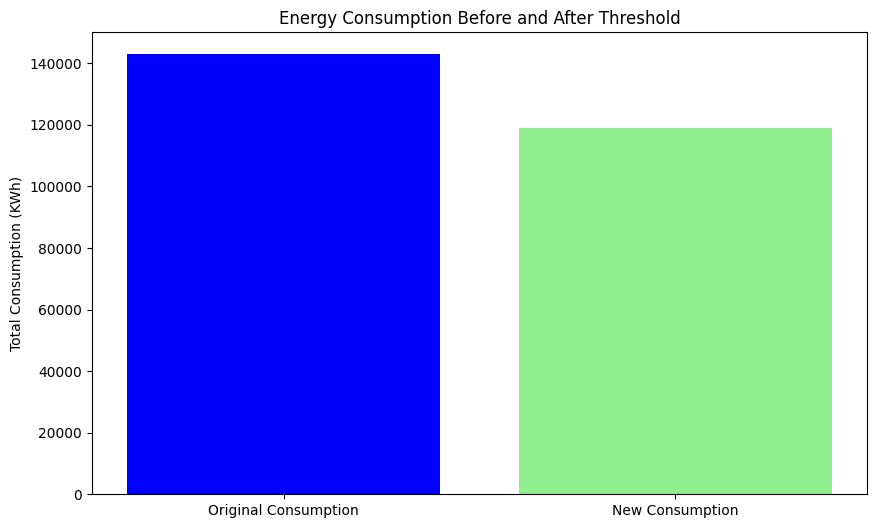

In [94]:
# Calculate the reduction in energy consumption due to the threshold
reduction_in_consumption = sum_original_consumption - sum_new_consumption
print(f"Reduction in Energy Consumption: {round(reduction_in_consumption, 2)} KWh")

# Plot the energy consumption before and after applying the threshold
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(['Original Consumption', 'New Consumption'],
        [sum_original_consumption, sum_new_consumption],
        color=['blue', 'lightgreen'])
plt.title("Energy Consumption Before and After Threshold")
plt.ylabel("Total Consumption (KWh)")
plt.show()


Cost Reduction: 4935.75 (in Pounds)


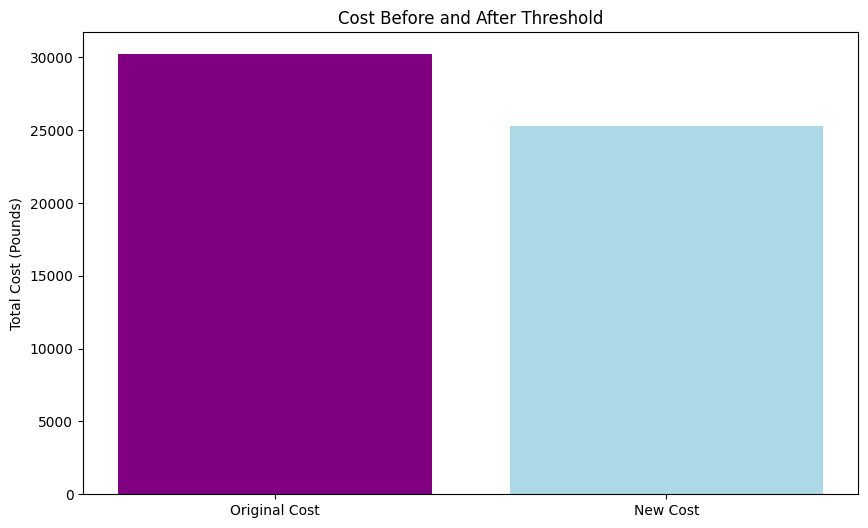

In [95]:
#cost savings
# Calculate the cost reduction
reduction_in_cost = sum_original_cost - sum_new_cost
print(f"Cost Reduction: {round(reduction_in_cost, 2)} (in Pounds)")

# Plot the cost before and after applying the threshold
plt.figure(figsize=(10, 6))
plt.bar(['Original Cost', 'New Cost'],
        [sum_original_cost, sum_new_cost],
        color=['purple', 'lightblue'])
plt.title("Cost Before and After Threshold")
plt.ylabel("Total Cost (Pounds)")
plt.show()


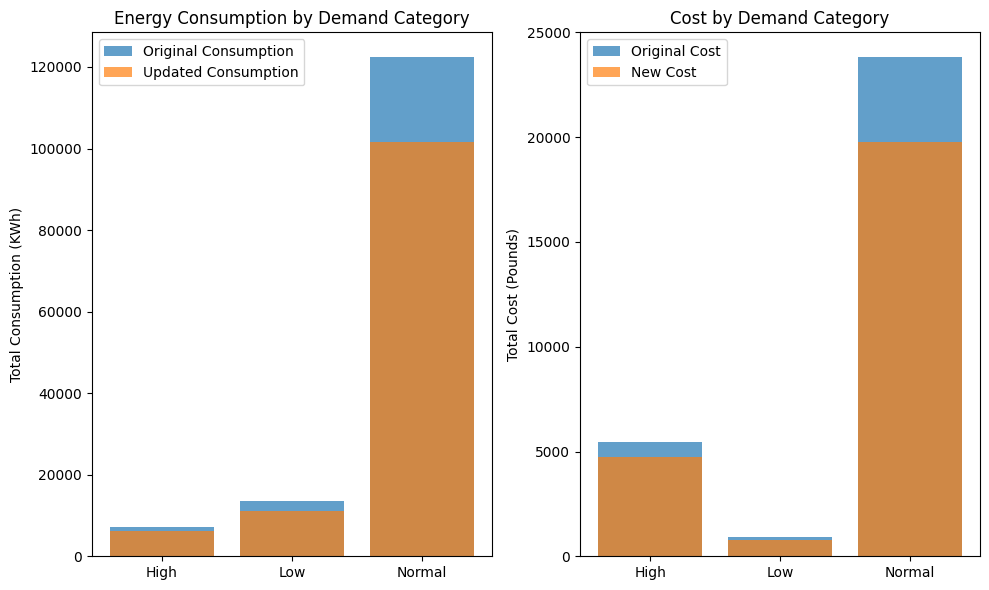

In [96]:
# Group by demand type and calculate the total consumption and cost for each group
grouped_data = merged_data.groupby('Demand').agg({
    'KWH_per_half_hour': 'sum',
    'Updated_KWH_per_half_hour': 'sum',
    'Cost': 'sum',
    'newcost': 'sum'
}).reset_index()

# Plot the total consumption and cost for each demand type
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Consumption plot
ax[0].bar(grouped_data['Demand'],
          grouped_data['KWH_per_half_hour'],
          label="Original Consumption", alpha=0.7)
ax[0].bar(grouped_data['Demand'],
          grouped_data['Updated_KWH_per_half_hour'],
          label="Updated Consumption", alpha=0.7)
ax[0].set_title("Energy Consumption by Demand Category")
ax[0].set_ylabel("Total Consumption (KWh)")
ax[0].legend()

# Cost plot
ax[1].bar(grouped_data['Demand'],
          grouped_data['Cost'],
          label="Original Cost", alpha=0.7)
ax[1].bar(grouped_data['Demand'],
          grouped_data['newcost'],
          label="New Cost", alpha=0.7)
ax[1].set_title("Cost by Demand Category")
ax[1].set_ylabel("Total Cost (Pounds)")
ax[1].legend()

plt.tight_layout()
plt.show()


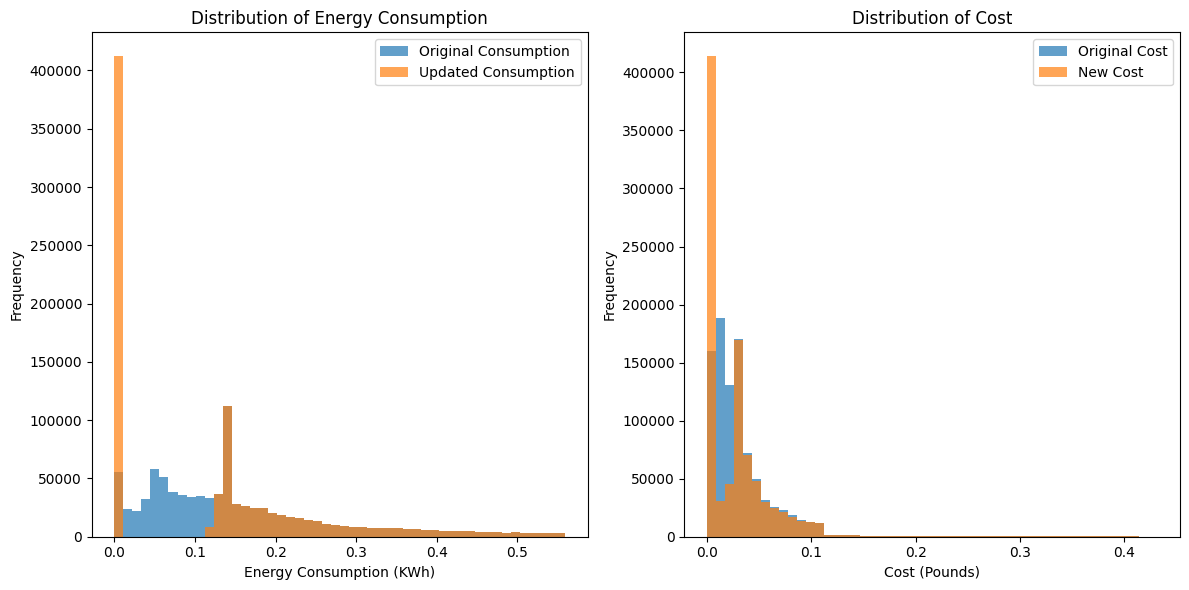

In [97]:
# Plot distribution of energy consumption and cost before and after threshold
plt.figure(figsize=(12, 6))

# Plot original vs updated consumption
plt.subplot(1, 2, 1)
plt.hist(merged_data['KWH_per_half_hour'], bins=50, alpha=0.7, label="Original Consumption")
plt.hist(merged_data['Updated_KWH_per_half_hour'], bins=50, alpha=0.7, label="Updated Consumption")
plt.title("Distribution of Energy Consumption")
plt.xlabel("Energy Consumption (KWh)")
plt.ylabel("Frequency")
plt.legend()

# Plot original vs new cost
plt.subplot(1, 2, 2)
plt.hist(merged_data['Cost'], bins=50, alpha=0.7, label="Original Cost")
plt.hist(merged_data['newcost'], bins=50, alpha=0.7, label="New Cost")
plt.title("Distribution of Cost")
plt.xlabel("Cost (Pounds)")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()
